# **The Problem** 
Can you imagine manually sorting through thousands of tweets, customer support conversations, or surveys? There’s just too much business data to process manually.
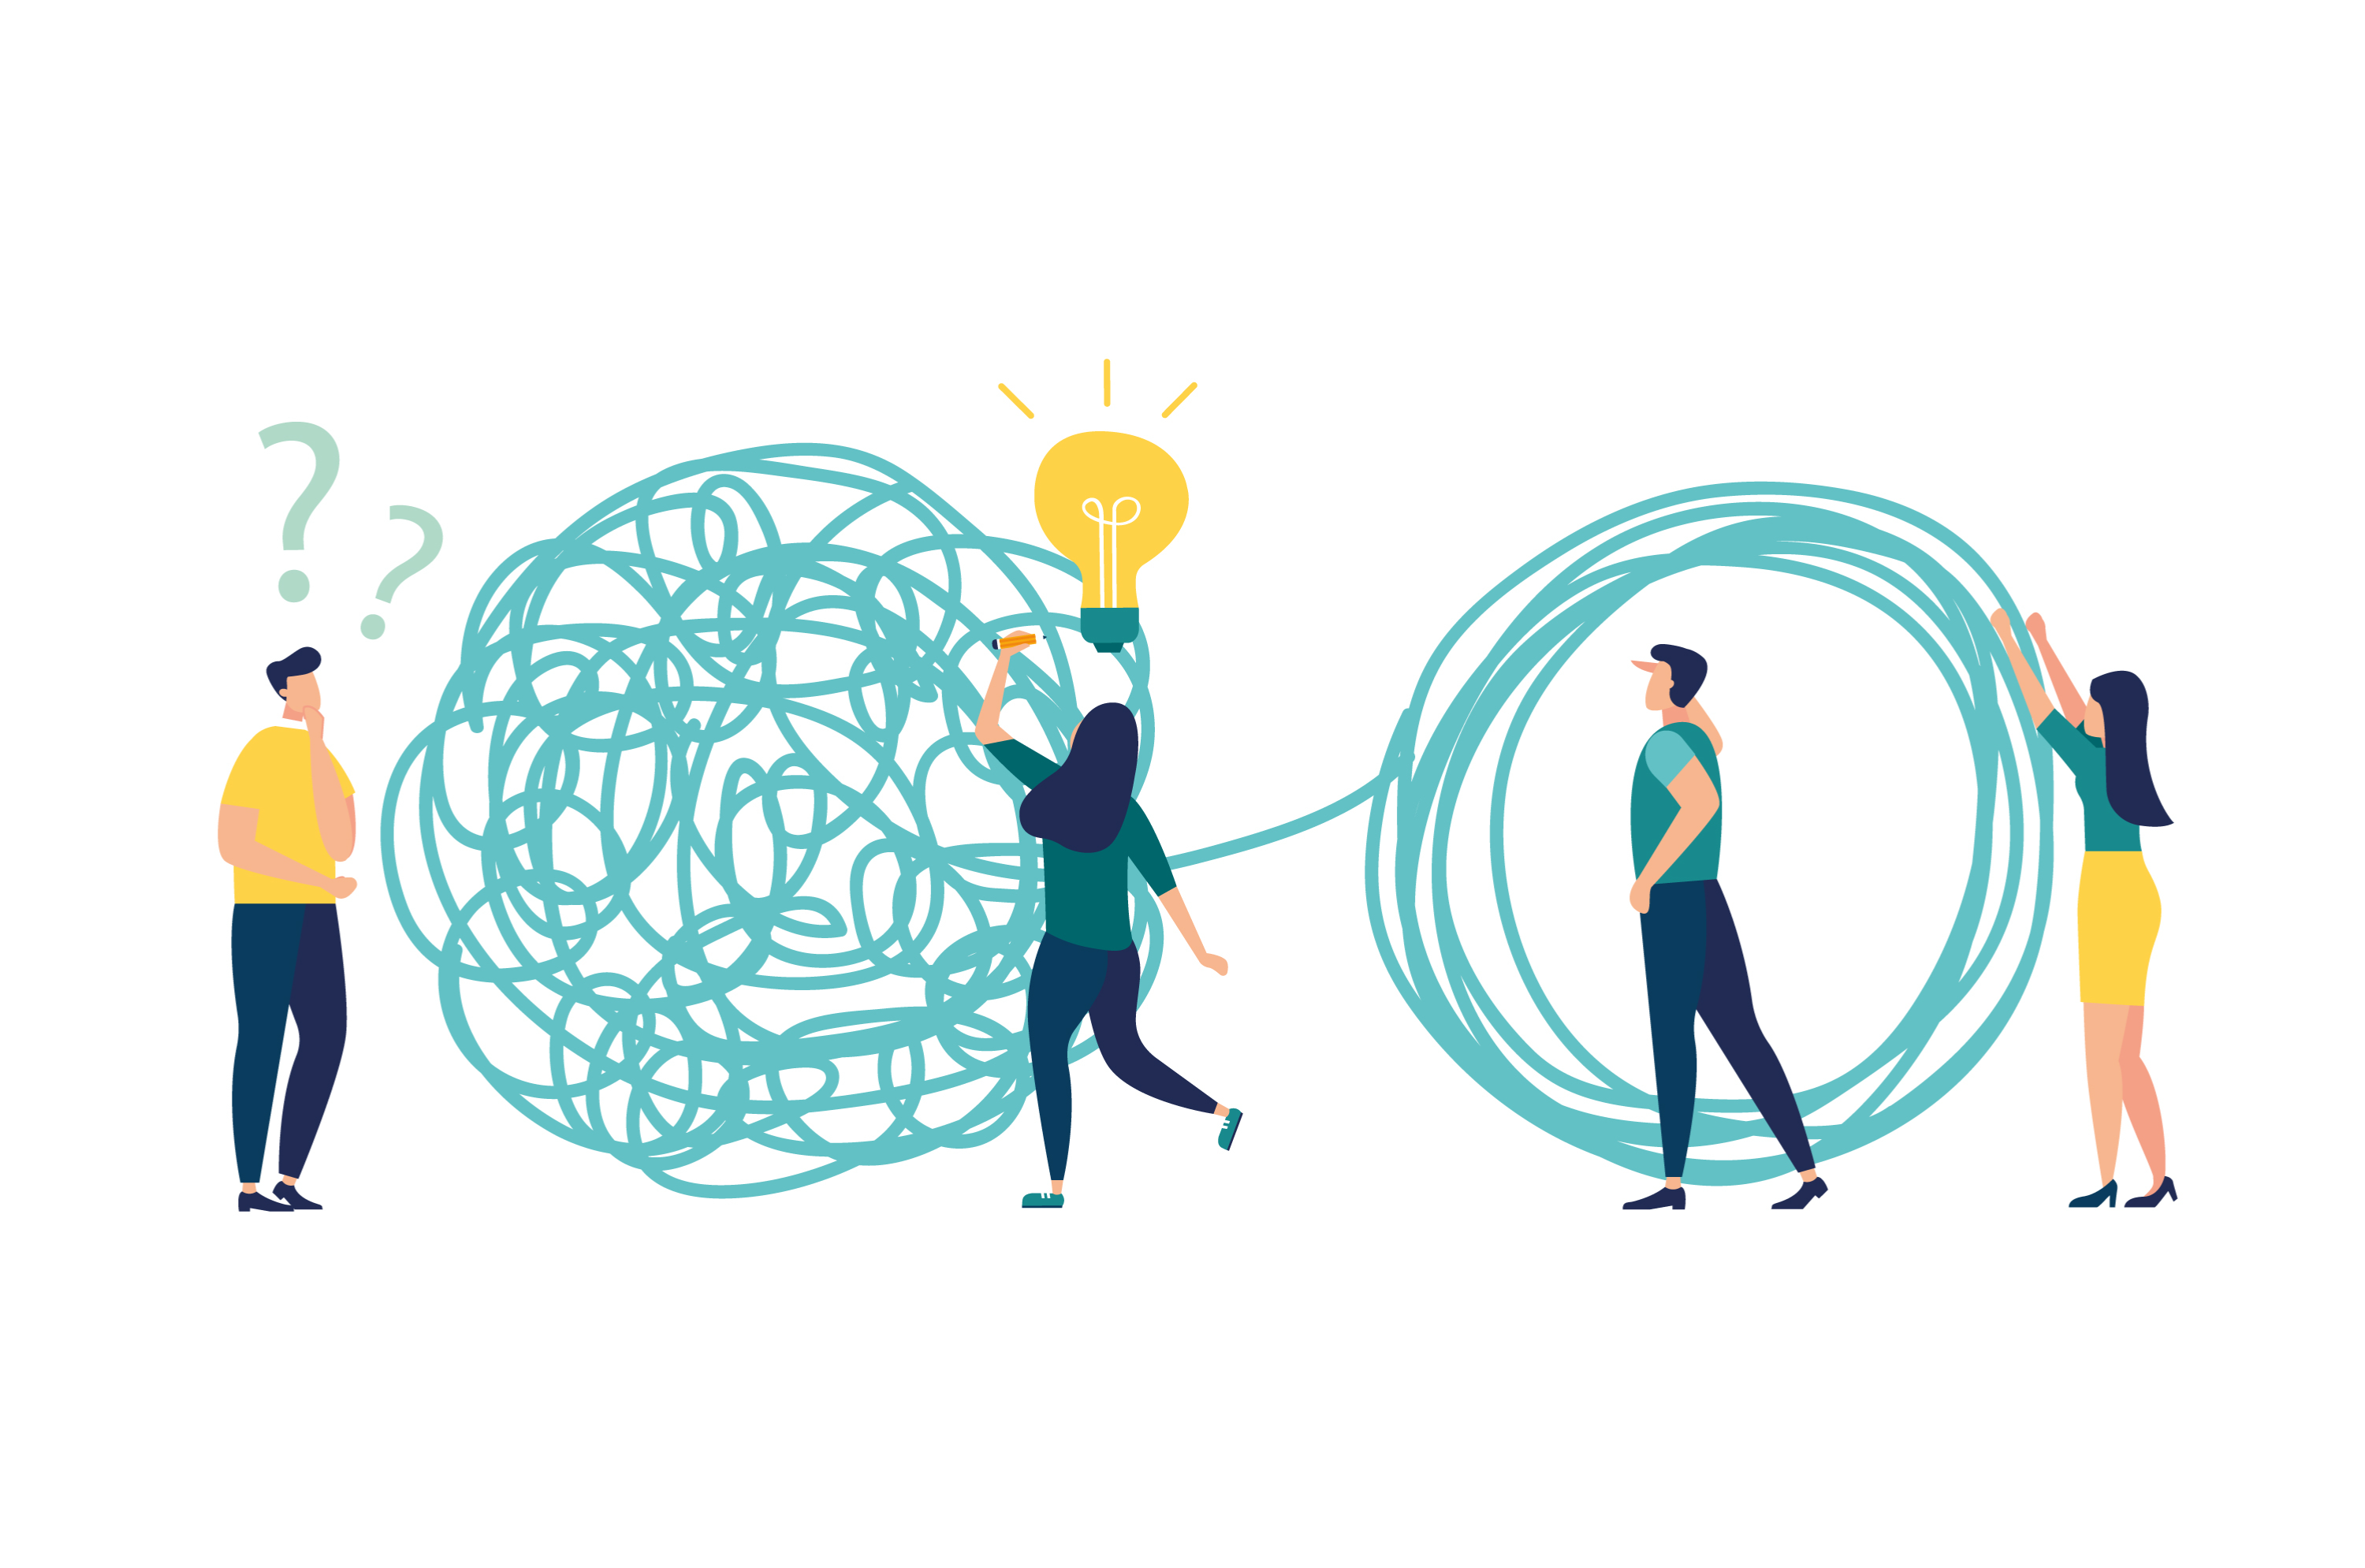

# **The Solution**

That's why **our idea** is about cleaning the data gathered from twitter which it contains the users' tweets in order to helps businesses process huge amounts of data in an efficient and cost-effective way through:

* Extract their sentiments
* Classify those sentiments depending on the users countries and continents
* Categorize each type of sentiment percentage per parts of the day : morning, night, midday.

---



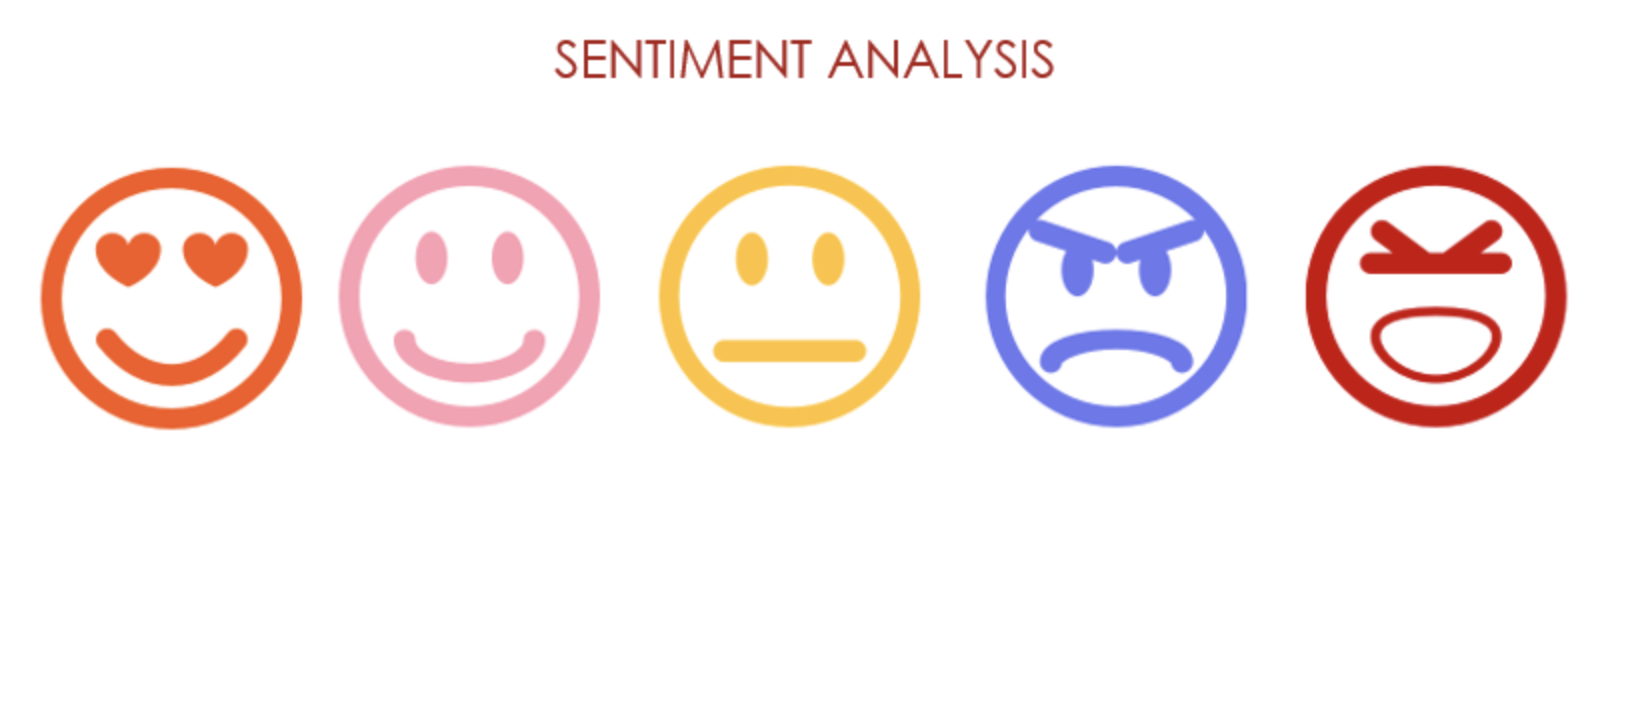



# **Sentiment Analysis**
It is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data and understand customer's behavior.

---
Since, nowadays customers express their thoughts and feelings more openly than ever before, sentiment analysis is becoming an essential tool to monitor and understand that sentiment.

---




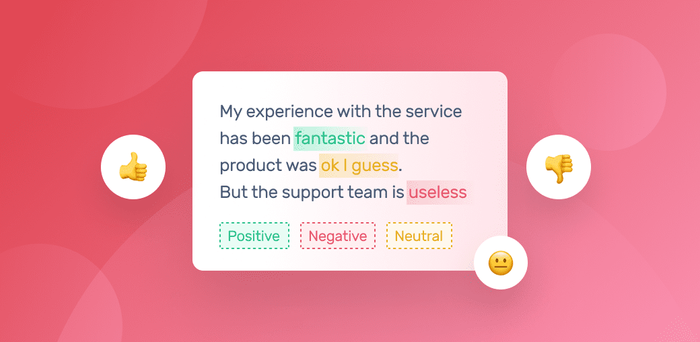


**Some information about the data set**

The data is a CSV with emoticons removed. The data file format has 6 fields:
* the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
* the id of the tweet (2087)
* the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* the query (lyx). If there is no query, then this value is NO_QUERY.
* the user that tweeted (robotickilldozr)
* the text of the tweet (Lyx is cool)



First, we started by:

In [1]:
import pandas as pd
import numpy as np
#Data acquisation
file_path="project.csv"
data_frame_init=pd.read_csv(file_path,header= 0,encoding= 'unicode_escape')
data_frame_init.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [2]:
file_path1="csvData.csv"
data_frame1=pd.read_csv(file_path1)
data_frame1.head()


,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Luxembourg,26321,31376,124590,634.814
1,United Arab Emirates,24292,27017,70089,9991.089
2,Norway,22684,25272,70005,5465.630
3,Switzerland,21490,25787,72376,8715.494
4,United States,19306,25332,65297,332915.073


In [3]:
del data_frame1['medianIncome']
del data_frame1['gdpPerCapitaPPP']
del data_frame1['pop2021']
df_new = data_frame1.rename(columns={'country': 'Country','meanIncome':'Income(2020/$)'})
data_frame1=df_new

In [4]:
data_frame1

,Country,Income(2020/$)
0,Luxembourg,31376
1,United Arab Emirates,27017
2,Norway,25272
3,Switzerland,25787
4,United States,25332
...,...,...
157,Burundi,640
158,Madagascar,567
159,DR Congo,548
160,China,4246


In [5]:
data_frame= pd.merge(data_frame_init, data_frame1, on='Country')

data_frame

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Income(2020/$)
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,3141
1,f0db54f5bf,im soo bored...im deffo missing my music channels,bored..,negative,noon,60-70,Albania,2877797.0,27400.0,105.0,3141
2,47990d2312,BRAINFREEZE,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,27400.0,105.0,3141
3,2f1cd44ea2,I didn`t want to tell you but I think it`s yo...,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,27400.0,105.0,3141
4,355a1e84e2,just had a great talk with grace about how awe...,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,3141
...,...,...,...,...,...,...,...,...,...,...,...
19556,0fe0464b08,Let me google that for you http://lmgtfy.com/,Let me google that for you http://lmgtfy.com/,neutral,night,31-45,Zimbabwe,14862924.0,386850.0,38.0,1429
19557,fc9b461812,"Good plan, Peg --plus I like the sound of 'Mo...","Good plan,",positive,night,70-100,Zimbabwe,14862924.0,386850.0,38.0,1429
19558,4b8392274d,I have too much homework to do today,I have too much homework to do today,negative,night,31-45,Zimbabwe,14862924.0,386850.0,38.0,1429
19559,87473c996a,Added Twitter updates to Facebook page at htt...,Added Twitter updates to Facebook page at htt...,neutral,night,70-100,Zimbabwe,14862924.0,386850.0,38.0,1429


And then we changed the density to density numerical so we can plot logical graphs later :

In [6]:
data_frame['Density (P/Km²)'].unique()

array([ 105.,   18.,   26.,   17.,  104.,    3.,  109.,  123., 1265.,
         47.,  383.,  108.,   20.,   11.,   64.,    4.,   25.,   76.,
        463.,   56.,    8.,   13.,  153.,   46.,  467.,  100.,   73.,
        131.,  137.,   43.,  225.,   71.,  103.,  313.,   31.,  115.,
         49.,  119.,    9.,  239.,   57.,  240.,   81.,  167.,   53.,
         70.,  414.,   89.,  107.,  464.,   52.,   93.,   72.,  400.,
        206.,  273.,  347.,    7.,   94.,  147.,   34.,   32.,   30.,
        667.,  242.,   48.,  203.,   99., 1802., 1380.,    5.,  626.,
         66.,  164.,    2.,   83.,   40.,  508.,   55.,   19.,  226.,
         15.,  287.,   58.,  368.,  124.,  111.,   84.,  525.,  301.,
        228.,   87.,  214.,  114.,  527.,  341.,  219.,   95.,   68.,
         67.,  152.,  110.,  393.,  229.,   75.,  118.,  281.,   79.,
        314.,   38.])

In [7]:
#Convert Sentiment to a numerical value
def density_to_intervall(x):
        if x in range(1,500): return 1
        if x in range (501,1000):  return 2
        if x in range (1001,1500): return 3
        if x in range(1501,2000): return 4

In [8]:
data_frame['density_numerical']=data_frame['Density (P/Km²)'].apply(density_to_intervall)

In [9]:
data_frame['density_numerical'].unique()

array([1, 3, 2, 4])

In [10]:
#DATA Observation :Insights 
print("the shape of the dataframe is " ,data_frame.shape)
print("the size of the dataframe is " ,data_frame.size)
print("the number of rows in the dataframe is " ,len(data_frame))
print("the number of columns of the dataframe is " ,len(data_frame.columns))

the shape of the dataframe is  (19561, 12)
the size of the dataframe is  234732
the number of rows in the dataframe is  19561
the number of columns of the dataframe is  12


In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19561 entries, 0 to 19560
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   textID             19561 non-null  object 
 1   text               19560 non-null  object 
 2   selected_text      19560 non-null  object 
 3   sentiment          19561 non-null  object 
 4   Time of Tweet      19561 non-null  object 
 5   Age of User        19561 non-null  object 
 6   Country            19561 non-null  object 
 7   Population -2020   19561 non-null  float64
 8   Land Area (Km²)    19561 non-null  float64
 9   Density (P/Km²)    19561 non-null  float64
 10  Income(2020/$)     19561 non-null  int64  
 11  density_numerical  19561 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.9+ MB


In [12]:
data_frame.isnull().sum()

textID               0
text                 1
selected_text        1
sentiment            0
Time of Tweet        0
Age of User          0
Country              0
Population -2020     0
Land Area (Km²)      0
Density (P/Km²)      0
Income(2020/$)       0
density_numerical    0
dtype: int64

In [13]:
#DATA CLEANING : ROWS with NaN value should be deleted 
#1)let's display the rows with NaN value 
data_frame[data_frame['text'].isnull()]
data_frame[data_frame['selected_text'].isnull()]

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Income(2020/$),density_numerical
12337,fdb77c3752,NaN,NaN,neutral,night,31-45,Namibia,2540905.0,823000.0,3.0,4023,1


In [14]:
#2)delete the row 
df1=data_frame.dropna(subset=['selected_text','text'],axis=0)
data_frame=df1

In [15]:
#3) check if the NaN values are gone or not :
data_frame.isnull().sum()


textID               0
text                 0
selected_text        0
sentiment            0
Time of Tweet        0
Age of User          0
Country              0
Population -2020     0
Land Area (Km²)      0
Density (P/Km²)      0
Income(2020/$)       0
density_numerical    0
dtype: int64

In [16]:
#4)let's get Rid of the informations that we don't need 
del data_frame['Land Area (Km²)']
del data_frame['textID']
del data_frame['text'] 

In [17]:
#5) check whether these 3 columns are deleted or not 
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19560 entries, 0 to 19560
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selected_text      19560 non-null  object 
 1   sentiment          19560 non-null  object 
 2   Time of Tweet      19560 non-null  object 
 3   Age of User        19560 non-null  object 
 4   Country            19560 non-null  object 
 5   Population -2020   19560 non-null  float64
 6   Density (P/Km²)    19560 non-null  float64
 7   Income(2020/$)     19560 non-null  int64  
 8   density_numerical  19560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [18]:
#Convert Sentiment to a numerical value
def sentiment_to_numeric(x):
        if x=='positive': return 1
        if x=='neutral':  return 0
        if x=='negative': return -1




In [19]:

data_frame['sentiment_numerical']=data_frame['sentiment'].apply(sentiment_to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
data_frame

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical
0,Sooo SAD,negative,noon,21-30,Albania,2877797.0,105.0,3141,1,-1
1,bored..,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1
2,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,105.0,3141,1,0
3,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1
4,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,105.0,3141,1,1
...,...,...,...,...,...,...,...,...,...,...
19556,Let me google that for you http://lmgtfy.com/,neutral,night,31-45,Zimbabwe,14862924.0,38.0,1429,1,0
19557,"Good plan,",positive,night,70-100,Zimbabwe,14862924.0,38.0,1429,1,1
19558,I have too much homework to do today,negative,night,31-45,Zimbabwe,14862924.0,38.0,1429,1,-1
19559,Added Twitter updates to Facebook page at htt...,neutral,night,70-100,Zimbabwe,14862924.0,38.0,1429,1,0


In [21]:
! pip install pycountry
! pip install pycountry_convert

     |████████████████████████████████| 10.1 MB 19.0 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=2fefddcd5990c8f52a7c1921bd7ac94752f7b7fad35312ab19cb1c2b832efc29
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry
     |████████████████████████████████| 213 kB 38.6 MB/s 
     |████████████████████████████████| 280 kB 74.5 MB/s 
     |████████████████████████████████| 280 kB 52.7 MB/s 
     |████████████████████████████████| 280 kB 53.4 MB/s 
     |████████████████████████████████| 280 kB 45.5 MB/s 
     |████████████████████████████████| 279 kB 62.0 MB/s 
     |████████████████████████████████| 279 kB 58.9 MB/s 
     |████████████████████████████████| 272 kB 76.2 MB/s 
     |████████████████████████████████| 272 kB 69.3 MB/s 
     |████████████████████████████████| 272 kB 50.4 MB/s 
     |████████████████████████████████| 270 kB 60.1 MB/s 
   

In [22]:
data_frame.replace({"C�te d'Ivoire":"Côte d'Ivoire"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
data_frame

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical
0,Sooo SAD,negative,noon,21-30,Albania,2877797.0,105.0,3141,1,-1
1,bored..,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1
2,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,105.0,3141,1,0
3,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1
4,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,105.0,3141,1,1
...,...,...,...,...,...,...,...,...,...,...
19556,Let me google that for you http://lmgtfy.com/,neutral,night,31-45,Zimbabwe,14862924.0,38.0,1429,1,0
19557,"Good plan,",positive,night,70-100,Zimbabwe,14862924.0,38.0,1429,1,1
19558,I have too much homework to do today,negative,night,31-45,Zimbabwe,14862924.0,38.0,1429,1,-1
19559,Added Twitter updates to Facebook page at htt...,neutral,night,70-100,Zimbabwe,14862924.0,38.0,1429,1,0


In [24]:
data_frame.loc[data_frame['Country'] == "Côte d'Ivoire" ]

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical


In [25]:
#in pycountry_convert documentation first we have to map each country name to it's country code (exp:France : F
import pycountry_convert as pc 
def convert(row):
    #convert country name to country code
    country_code = pc.country_name_to_country_alpha2(row.Country,cn_name_format = "default")
    #convert country code to continent code
    continent_code=pc.country_alpha2_to_continent_code(country_code)
    return continent_code

In [26]:
data_frame.replace({"Congo (Congo-Brazzaville)":"Congo"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [27]:
data_frame.replace({"Czechia (Czech Republic)":"Czechia"},inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [28]:
data_frame.replace({'Eswatini (fmr. "Swaziland")':"Eswatini"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [29]:
data_frame.replace({"Holy See (Vatican City State))":"Holy See"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [30]:

data_frame.drop(data_frame[data_frame['Country'] == "Holy See"].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
data_frame.replace({"Myanmar (formerly Burma)":"Myanmar"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [32]:
data_frame.replace({"Palestine State":"Palestine"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [33]:
data_frame.drop(data_frame[data_frame['Country'] == "Palestine"].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
data_frame.head()

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical
0,Sooo SAD,negative,noon,21-30,Albania,2877797.0,105.0,3141,1,-1
1,bored..,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1
2,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,105.0,3141,1,0
3,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1
4,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,105.0,3141,1,1


In [35]:
data_frame.loc[data_frame['Country'] == "Holy See" ]

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical


In [36]:
data_frame.drop(data_frame[data_frame['Country'] == "Timor-Leste"].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
#we clean data by changing the country names by it's correct value 
data_frame['continent']=data_frame.apply(convert,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19560
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   selected_text        19445 non-null  object 
 1   sentiment            19445 non-null  object 
 2   Time of Tweet        19445 non-null  object 
 3   Age of User          19445 non-null  object 
 4   Country              19445 non-null  object 
 5   Population -2020     19445 non-null  float64
 6   Density (P/Km²)      19445 non-null  float64
 7   Income(2020/$)       19445 non-null  int64  
 8   density_numerical    19445 non-null  int64  
 9   sentiment_numerical  19445 non-null  int64  
 10  continent            19445 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.8+ MB


In [40]:
data_frame

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical,continent
0,Sooo SAD,negative,noon,21-30,Albania,2877797.0,105.0,3141,1,-1,EU
1,bored..,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1,EU
2,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,105.0,3141,1,0,EU
3,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1,EU
4,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,105.0,3141,1,1,EU
...,...,...,...,...,...,...,...,...,...,...,...
19556,Let me google that for you http://lmgtfy.com/,neutral,night,31-45,Zimbabwe,14862924.0,38.0,1429,1,0,AF
19557,"Good plan,",positive,night,70-100,Zimbabwe,14862924.0,38.0,1429,1,1,AF
19558,I have too much homework to do today,negative,night,31-45,Zimbabwe,14862924.0,38.0,1429,1,-1,AF
19559,Added Twitter updates to Facebook page at htt...,neutral,night,70-100,Zimbabwe,14862924.0,38.0,1429,1,0,AF


In [41]:
file_name="data_new1.csv"
data_frame.to_csv(file_name, sep=';', encoding='utf-8')

In [42]:
# Create dataframe for Count of Sentiment Categories
sentiment_chart = data_frame['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total Tweets').reset_index()
sentiment_chart

,sentiment,Total Tweets
0,neutral,7795
1,positive,6100
2,negative,5550


In [43]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 114 kB/s 


In [44]:
# create a data frame for count of number of tweets coming from each continent
continent_chart=data_frame['continent'].value_counts().rename_axis('continent').to_frame('Total Tweets').reset_index()
continent_chart

,continent,Total Tweets
0,AF,5746
1,EU,4828
2,AS,4311
3,NA,1819
4,SA,1514
5,OC,1227


In [45]:

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go # For plotting plotly graph objects

fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = continent_chart['Total Tweets'].head(5), y=continent_chart['continent'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)


# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])
# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Twitter Users per Continent' <i>(5 Most Common Users)</i>",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Continent', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Users', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
continent_chart
x = continent_chart['continent'].head(5).to_list()
y = continent_chart['Total Tweets'].head(5).to_list()





<Figure size 1008x1296 with 0 Axes>

In [46]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()


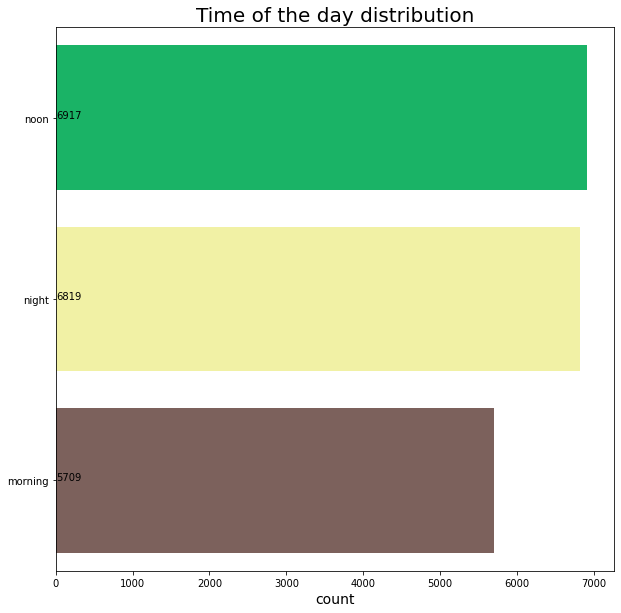

In [47]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns


time_tweet_distribution=  data_frame['Time of Tweet'].value_counts()
drawbarplot(x=time_tweet_distribution.values,y=time_tweet_distribution.index,xlabel='count',title='Time of the day distribution',figsize=(10,10))

In [48]:
#Create a data_frame for count of positive/neutral/negative sentiment coming from each 
count=data_frame.groupby(['sentiment','continent']).count()



In [49]:
#4)let's get Rid of the informations that we don't need 
del count['Time of Tweet']
del count['Age of User']
del count['Country'] 


In [50]:

del count['Density (P/Km²)']
del count['sentiment_numerical'] 

In [51]:
count = count.rename(columns={'selected_text': 'Total tweets'})

In [52]:
count

Total tweets  ...  density_numerical
sentiment continent                ...                   
negative  AF                 1626  ...               1626
          AS                 1234  ...               1234
          EU                 1410  ...               1410
          NA                  530  ...                530
          OC                  341  ...                341
          SA                  409  ...                409
neutral   AF                 2336  ...               2336
          AS                 1708  ...               1708
          EU                 1921  ...               1921
          NA                  728  ...                728
          OC                  492  ...                492
          SA                  610  ...                610
positive  AF                 1784  ...               1784
          AS                 1369  ...               1369
          EU                 1497  ...               1497
          NA                  561  ...                561
          OC                  394  ...                394
          SA                  495  ...                495

[18 rows x 4 columns]

In [53]:
sentiment_Time_Continent_data_frame=data_frame.groupby(['sentiment','Time of Tweet','continent']).count()

del sentiment_Time_Continent_data_frame['Age of User']
del sentiment_Time_Continent_data_frame['Country'] 
del sentiment_Time_Continent_data_frame['Population -2020']

del sentiment_Time_Continent_data_frame['sentiment_numerical'] 
sentiment_Time_Continent_data_frame = sentiment_Time_Continent_data_frame.rename(columns={'selected_text': 'Total tweets'})

In [54]:
#Conclusion we started by 27478 rows we ended up after cleaning with 27078

 # **DESCRIPTIVE ANALYSIS** 📃


In [55]:
data_frame.head()

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical,continent
0,Sooo SAD,negative,noon,21-30,Albania,2877797.0,105.0,3141,1,-1,EU
1,bored..,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1,EU
2,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,105.0,3141,1,0,EU
3,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1,EU
4,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,105.0,3141,1,1,EU


In [56]:
#There are two main types of data: categorical data (qualitative) and numerical data (quantitative).
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19560
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   selected_text        19445 non-null  object 
 1   sentiment            19445 non-null  object 
 2   Time of Tweet        19445 non-null  object 
 3   Age of User          19445 non-null  object 
 4   Country              19445 non-null  object 
 5   Population -2020     19445 non-null  float64
 6   Density (P/Km²)      19445 non-null  float64
 7   Income(2020/$)       19445 non-null  int64  
 8   density_numerical    19445 non-null  int64  
 9   sentiment_numerical  19445 non-null  int64  
 10  continent            19445 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.8+ MB


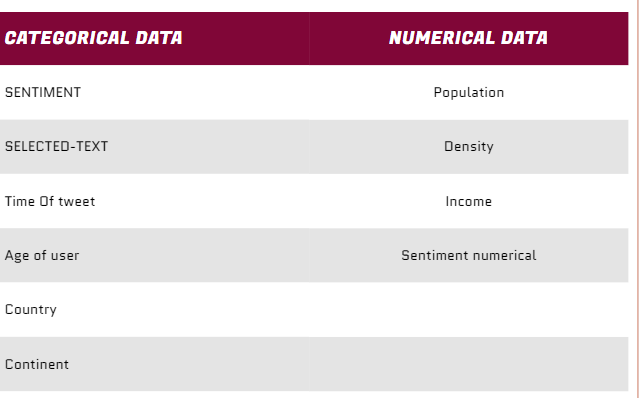

In [57]:
data_frame.shape

(19445, 11)

In [58]:
data_frame.isnull().sum()

selected_text          0
sentiment              0
Time of Tweet          0
Age of User            0
Country                0
Population -2020       0
Density (P/Km²)        0
Income(2020/$)         0
density_numerical      0
sentiment_numerical    0
continent              0
dtype: int64

In [59]:
data_frame.count()

selected_text          19445
sentiment              19445
Time of Tweet          19445
Age of User            19445
Country                19445
Population -2020       19445
Density (P/Km²)        19445
Income(2020/$)         19445
density_numerical      19445
sentiment_numerical    19445
continent              19445
dtype: int64

In [60]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Population -2020,19445.0,4.495058e+07,1.662906e+08,11792.0,2961167.0,10139177.0,32365999.0,1.439324e+09
Density (P/Km²),19445.0,1.539498e+02,2.381774e+02,2.0,31.0,83.0,164.0,1.802000e+03
Income(2020/$),19445.0,6.361212e+03,6.549970e+03,567.0,1659.0,3741.0,8131.0,3.137600e+04
density_numerical,19445.0,1.080741e+00,3.783400e-01,1.0,1.0,1.0,1.0,4.000000e+00
sentiment_numerical,19445.0,2.828491e-02,7.735351e-01,-1.0,-1.0,0.0,1.0,1.000000e+00


In [61]:
data_frame.isna().any()

selected_text          False
sentiment              False
Time of Tweet          False
Age of User            False
Country                False
Population -2020       False
Density (P/Km²)        False
Income(2020/$)         False
density_numerical      False
sentiment_numerical    False
continent              False
dtype: bool

In [62]:
data_frame.continent.unique()

array(['EU', 'AF', 'SA', 'AS', 'OC', 'NA'], dtype=object)

In [63]:
data_frame.Country.value_counts()

Armenia        135
Argentina      135
Albania        135
Australia      135
Austria        135
              ... 
Tajikistan     115
Saint Lucia    115
Norway         115
South Korea    115
Syria          115
Name: Country, Length: 153, dtype: int64

In [64]:
data_frame.sentiment_numerical.value_counts(normalize=True) * 100

 0    40.087426
 1    31.370532
-1    28.542042
Name: sentiment_numerical, dtype: float64

In [65]:
pd.crosstab(data_frame.sentiment_numerical, data_frame.continent)

continent,AF,AS,EU,NA,OC,SA
sentiment_numerical,,,,,,
-1,1626,1234,1410,530,341,409
0,2336,1708,1921,728,492,610
1,1784,1369,1497,561,394,495


In [66]:
#6)Cleaning and processing sentiment column 
data_frame['sentiment'].describe()


count       19445
unique          3
top       neutral
freq         7795
Name: sentiment, dtype: object

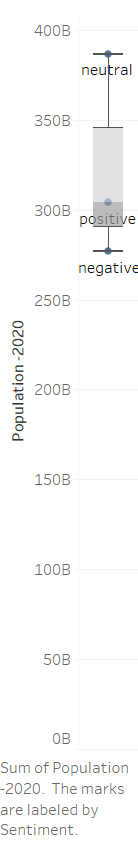

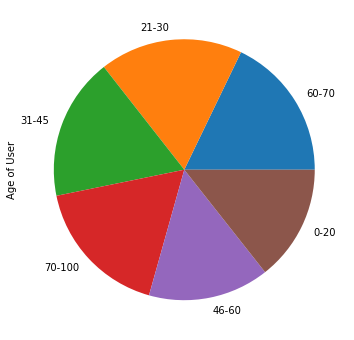

In [67]:
data_frame['Age of User'].value_counts().plot(kind='pie', figsize=(10,6))

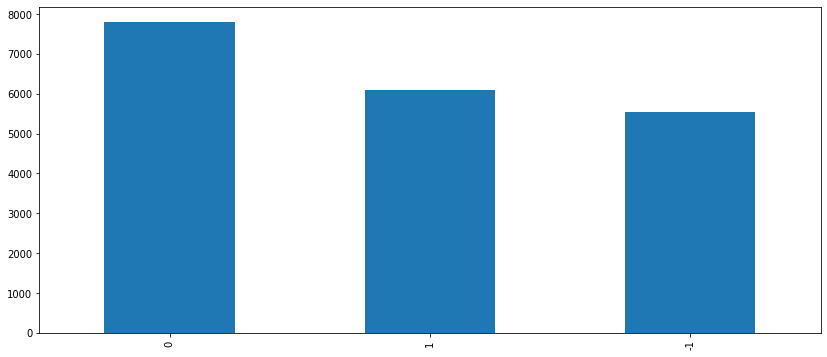

In [68]:
ax = data_frame['sentiment_numerical'].value_counts().plot(kind='bar', figsize=(14,6))

 # **Exploratory ANALYSIS** 📃

In [69]:
import plotly.express as px
import plotly.graph_objects as go

import plotly

sentiments_barchart = px.bar(sentiment_chart, x = 'sentiment', y='Total Tweets')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})



In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_frame.corr(method ='pearson')

,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical
Population -2020,1.000000,0.097838,-0.069090,-0.012534,-0.001224
Density (P/Km²),0.097838,1.000000,0.090871,0.886846,0.007434
Income(2020/$),-0.069090,0.090871,1.000000,0.076339,-0.003086
density_numerical,-0.012534,0.886846,0.076339,1.000000,0.008188
sentiment_numerical,-0.001224,0.007434,-0.003086,0.008188,1.000000


In [71]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(data_frame)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical
Population -2020,1.000000,0.097838,-0.069090,-0.012534,-0.001224
Density (P/Km²),0.097838,1.000000,0.090871,0.886846,0.007434
Income(2020/$),-0.069090,0.090871,1.000000,0.076339,-0.003086
density_numerical,-0.012534,0.886846,0.076339,1.000000,0.008188
sentiment_numerical,-0.001224,0.007434,-0.003086,0.008188,1.000000


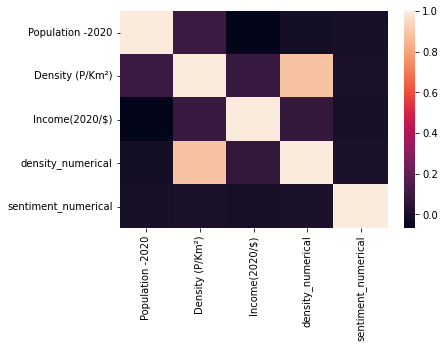

In [72]:
sns.heatmap(data_frame.corr());



```

```

# **HYPOTHESIS**

PEOPLE WITH LOW INCOME EXPRESS MORE THEIR DEPRESSION

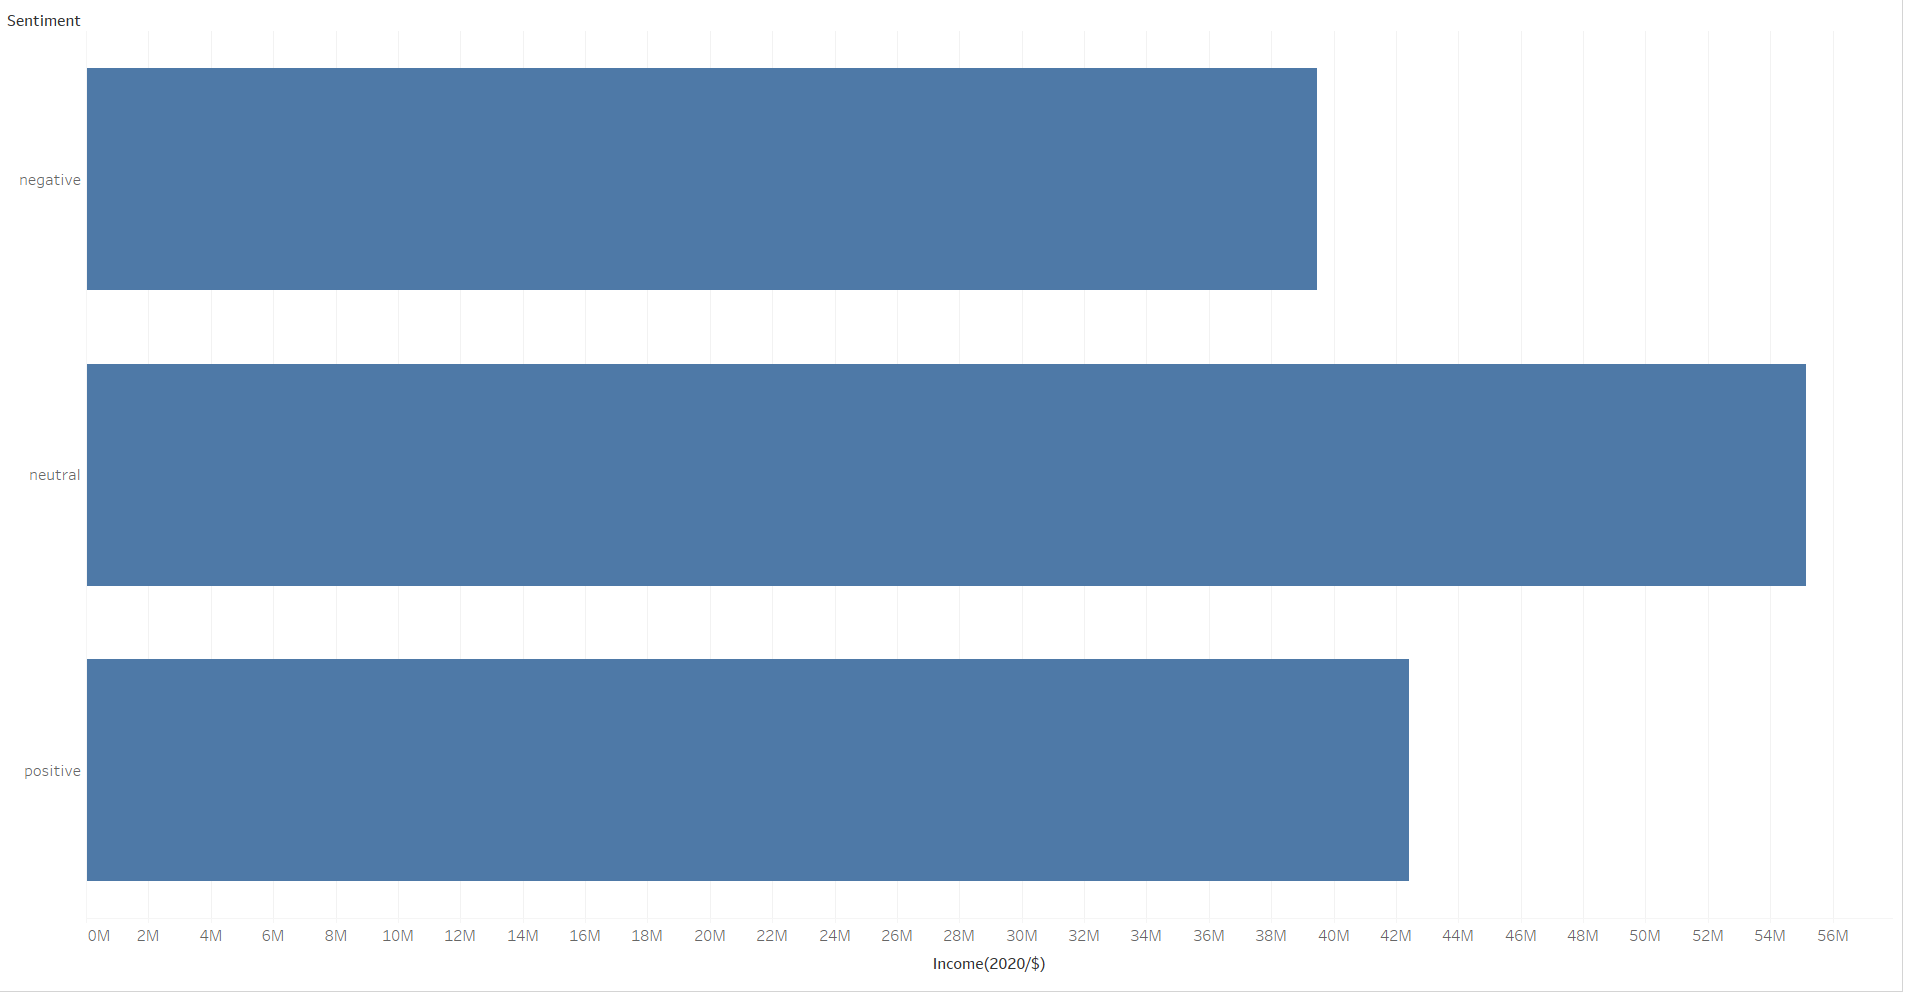



---



---


## Users with higher income are the most positive 



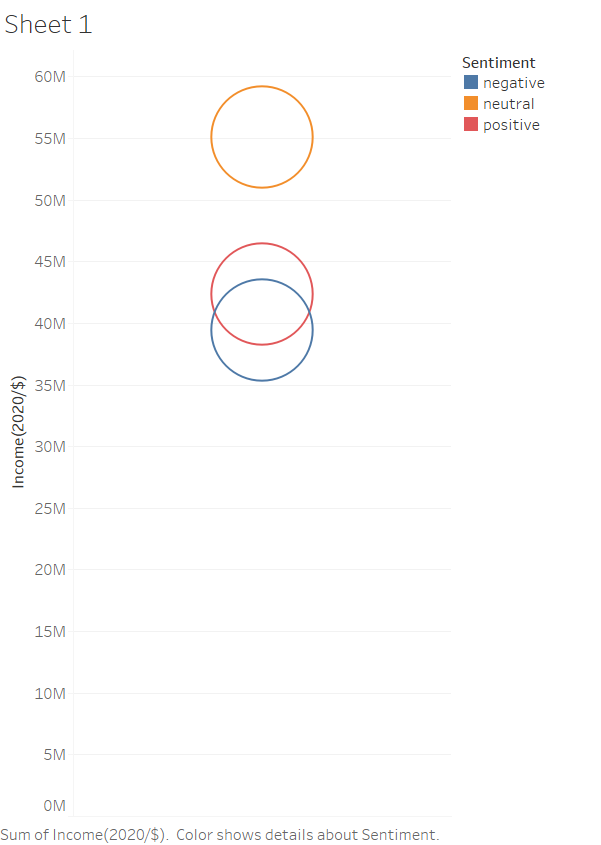

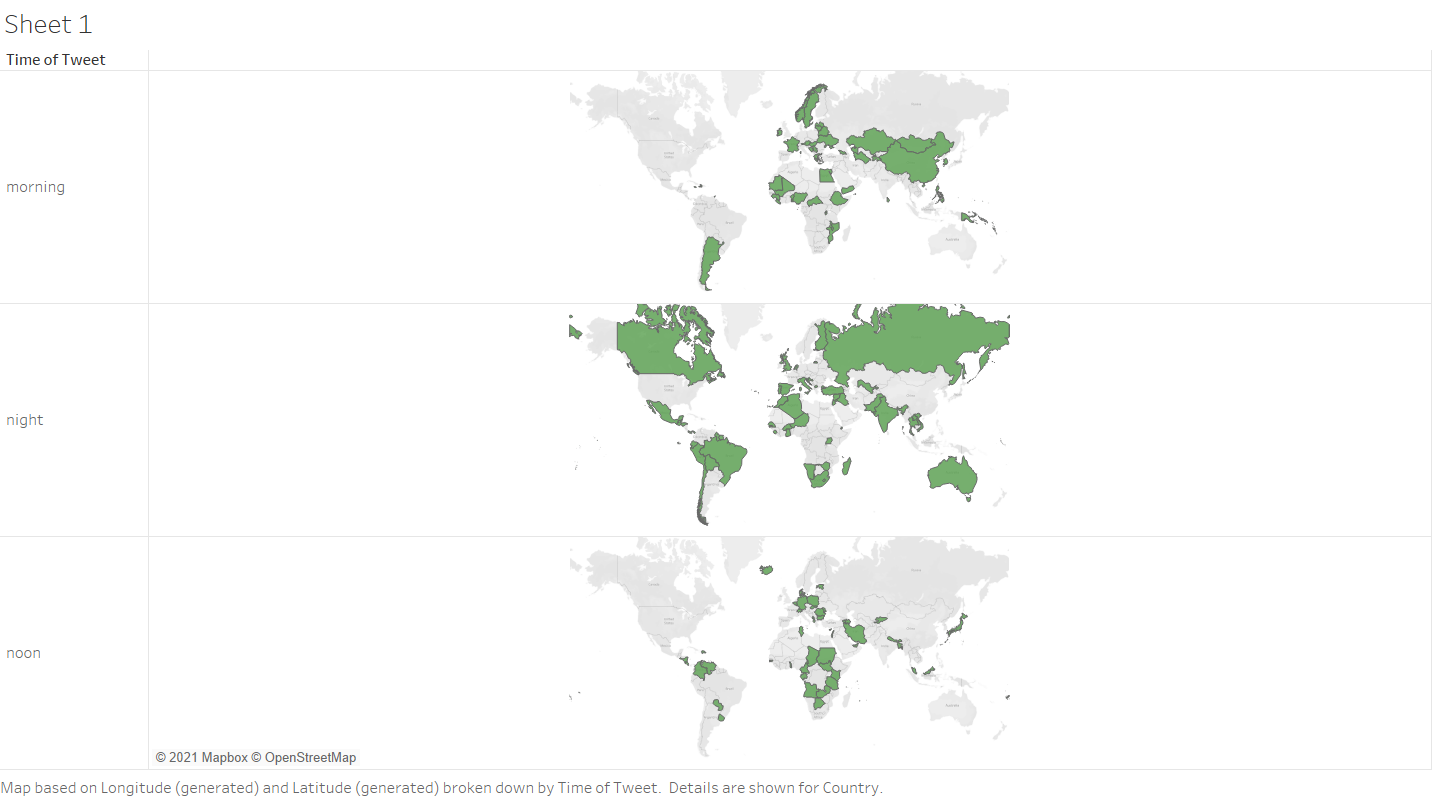

**▶  The highlighted countries shows the time at which its users publish their tweets**



---



---



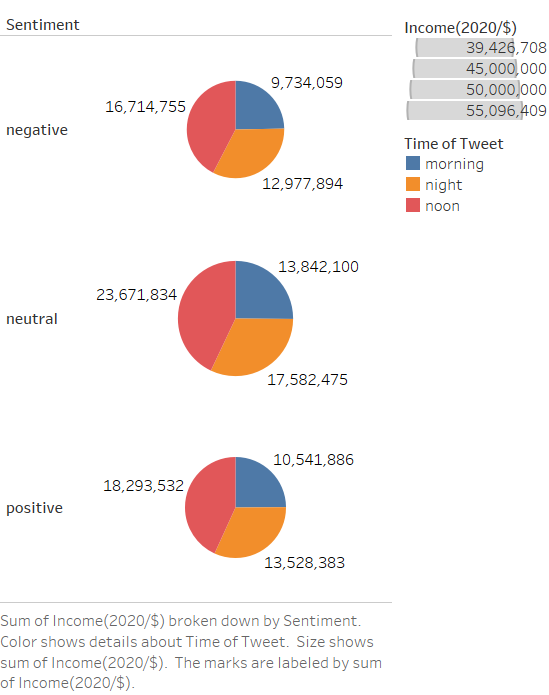




---



---


## Users with higher income and low density are postive in the morning 

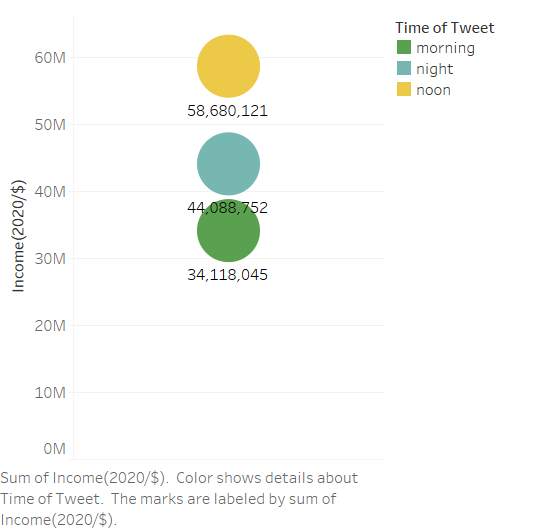

## Young users are the ones connected at night, while adult users are the ones connected in the morning 

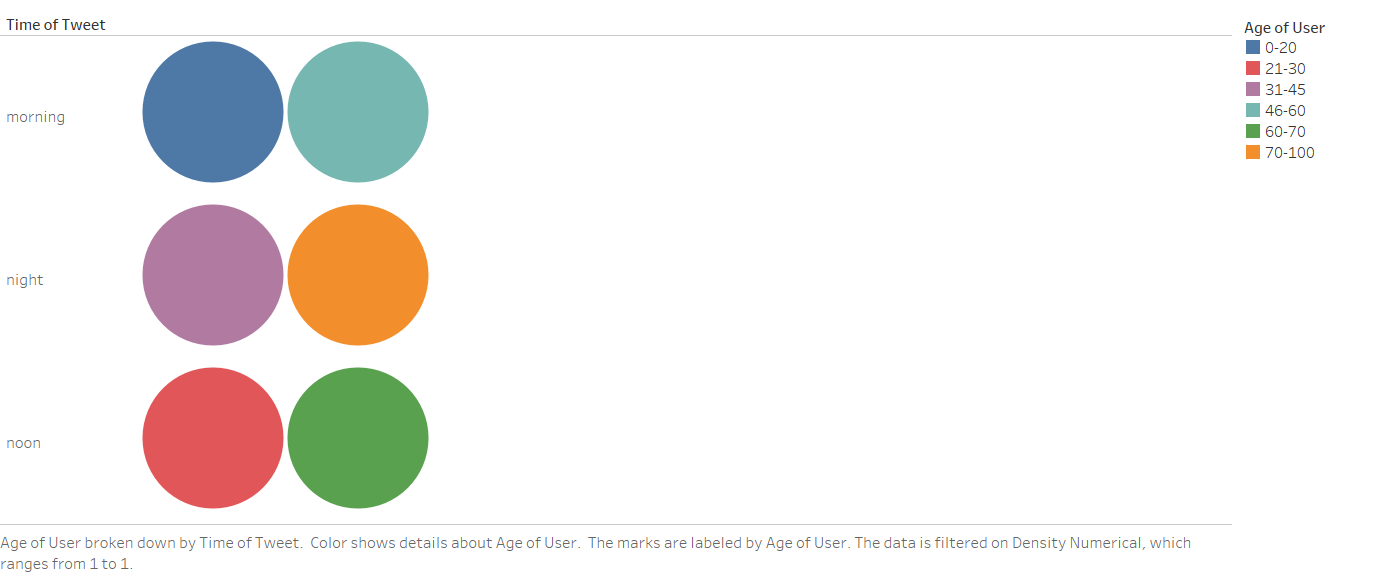

##Users with high income are the most positive 

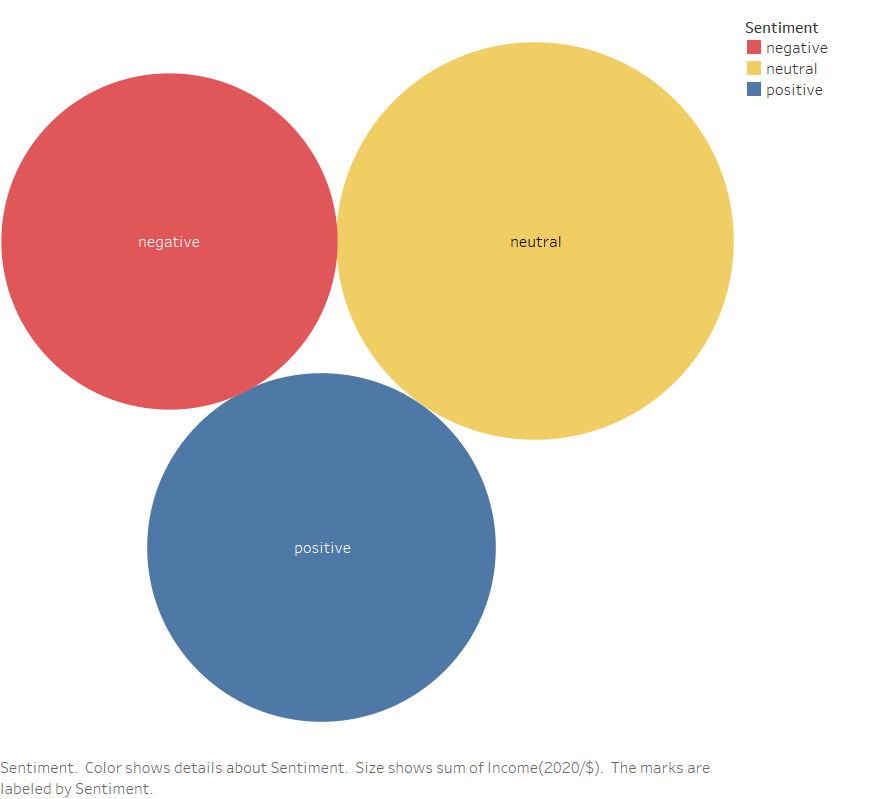

##Users aging between [31-45] with high income are the most positive .

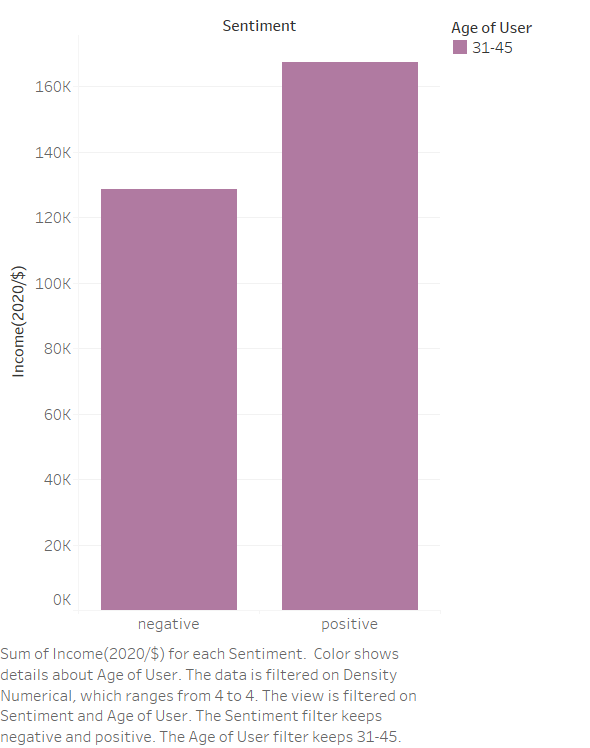

##In all continents, higher income means more positive people.

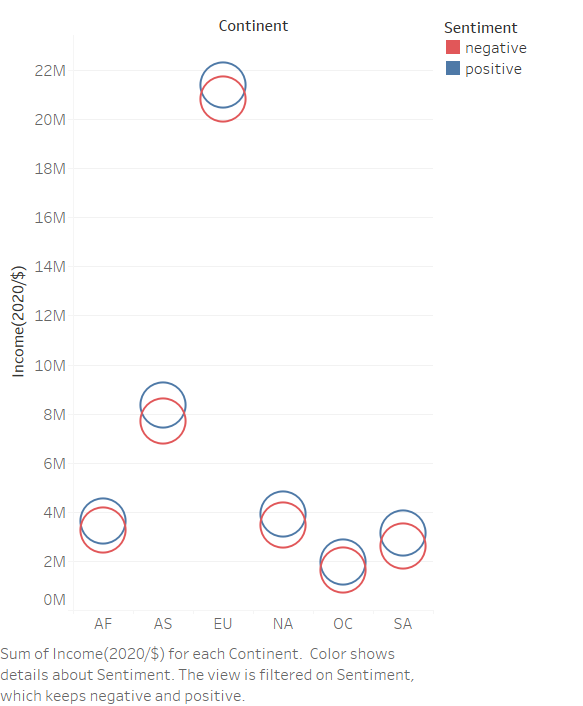

##High dense continent (ASIA) are more negative at night 

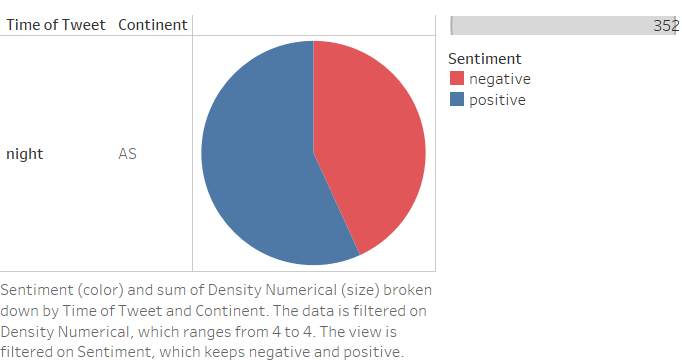

##High dense countries have more young users .

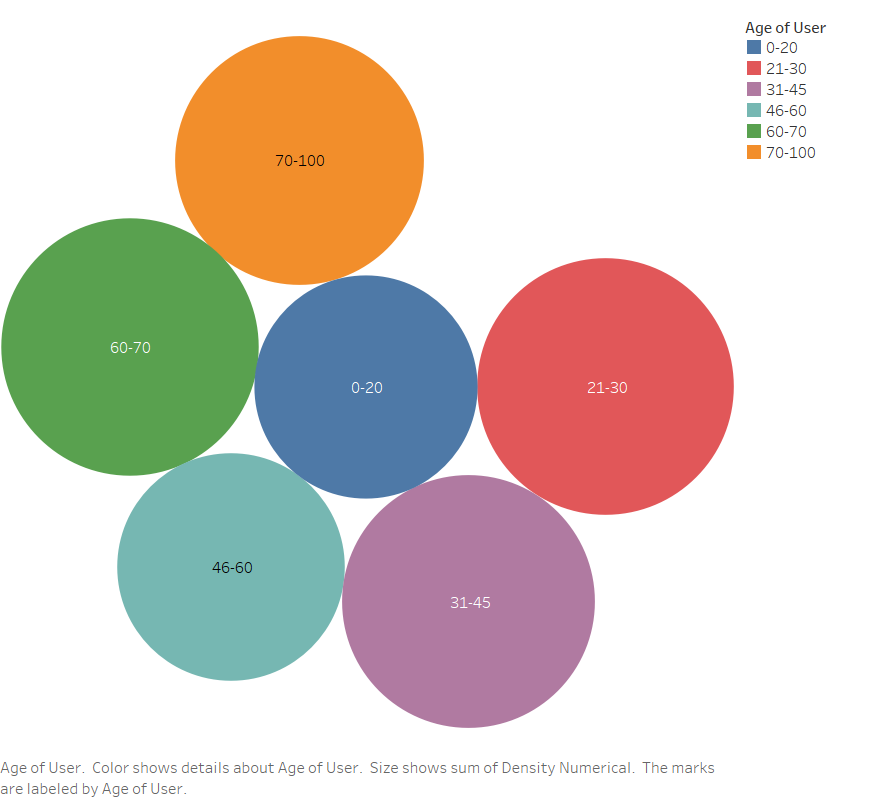

##Users with higher income tweet in the morning 

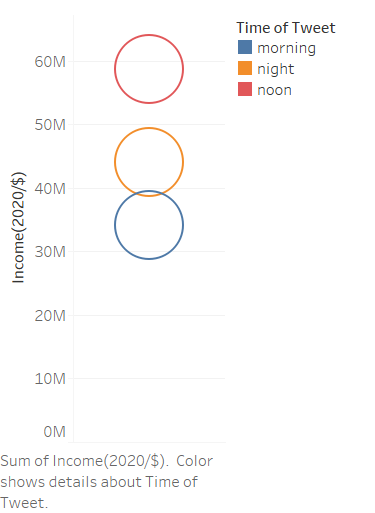

# **PREDICTION MODEL**

In [73]:
import numpy as np
import tensorflow as tf
import pandas as pd
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string 
nltk.download('stopwords')
import gensim
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [74]:
data_frame.head()

,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Density (P/Km²),Income(2020/$),density_numerical,sentiment_numerical,continent
0,Sooo SAD,negative,noon,21-30,Albania,2877797.0,105.0,3141,1,-1,EU
1,bored..,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1,EU
2,BRAINFREEZE,neutral,noon,21-30,Albania,2877797.0,105.0,3141,1,0,EU
3,I didn`t want to tell you but I think it`s you...,negative,noon,60-70,Albania,2877797.0,105.0,3141,1,-1,EU
4,just had a great talk with grace about how awe...,positive,noon,21-30,Albania,2877797.0,105.0,3141,1,1,EU


In [75]:
df = data_frame[['selected_text', 'sentiment_numerical']]

In [76]:
df

,selected_text,sentiment_numerical
0,Sooo SAD,-1
1,bored..,-1
2,BRAINFREEZE,0
3,I didn`t want to tell you but I think it`s you...,-1
4,just had a great talk with grace about how awe...,1
...,...,...
19556,Let me google that for you http://lmgtfy.com/,0
19557,"Good plan,",1
19558,I have too much homework to do today,-1
19559,Added Twitter updates to Facebook page at htt...,0


In [77]:
np.savetxt(r"selectedtweets.txt", df.selected_text.values, fmt='%s')

In [78]:
df['selected_text'].tolist()

['Sooo SAD',
 'bored..',
 'BRAINFREEZE',
 'I didn`t want to tell you but I think it`s your body odour',
 'just had a great talk with grace about how awesome God is and how he works...that somehow started with how remote controls work',
 '_Aid16 Goodnight!',
 'Safari 4 beta (OS X) is in a crash loop on startup. Back to non- cookie saving Firefox.',
 'so emotional.',
 'Hey Mr Luketic! I don`t have your number to send by phone.  You can email me at heathfox.com if that would be ok.',
 'Gooood',
 'Wanna go out',
 'is that it`s welsh name?',
 'love',
 'Not feelin right.',
 'ohh yeahh with the showcase he said his artist will be outta town  so keep me posted as to the next one',
 'perfection',
 'That`s how you go from series to season. The days of being an elite team are over in Dallas. EPL Derby Day tomorrow. Tell me what I miss.',
 'Bored and lonely at work',
 'Yeahhhhhhhhhhhhh friday..and I work tomorrow',
 'ilove',
 'is currently watching supernatural whilst waiting for skins to come on'

In [79]:
TRAIN_SIZE = 0.8
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 15556
TEST size: 3889


In [80]:
df.shape

(19445, 2)

In [81]:
tweet_review = df.selected_text.apply(gensim.utils.simple_preprocess)
tweet_review

0                                              [sooo, sad]
1                                                  [bored]
2                                            [brainfreeze]
3        [didn, want, to, tell, you, but, think, it, yo...
4        [just, had, great, talk, with, grace, about, h...
                               ...                        
19556    [let, me, google, that, for, you, http, lmgtfy...
19557                                         [good, plan]
19558           [have, too, much, homework, to, do, today]
19559    [added, twitter, updates, to, facebook, page, ...
19560    [aw, thas, good, im, glad, your, happy, jus, b...
Name: selected_text, Length: 19445, dtype: object

In [82]:
def tokenize(corpus):
    df = re.sub(r'[(/!?,;+\-:)]','.',corpus)
    tokenizer = TweetTokenizer()
    df = tokenizer.tokenize(df)

    stopwords = set(nltk.corpus.stopwords.words('english'))

    df = [token.lower() for token in df
                if token.isalpha() and token not in stopwords and token not in string.punctuation
                or token =='.']
    df = [t for t in df if len(t) > 2 and t.isalnum()]
    # data = [lemmatizer.lemmatize(t) for t in data]
    return df


In [83]:
df

,selected_text,sentiment_numerical
0,Sooo SAD,-1
1,bored..,-1
2,BRAINFREEZE,0
3,I didn`t want to tell you but I think it`s you...,-1
4,just had a great talk with grace about how awe...,1
...,...,...
19556,Let me google that for you http://lmgtfy.com/,0
19557,"Good plan,",1
19558,I have too much homework to do today,-1
19559,Added Twitter updates to Facebook page at htt...,0


In [84]:
with open('/content/selectedtweets.txt') as f:
    text=f.read()

tokens = tokenize(text)

In [85]:
def get_window(df, c):
  pairs=[]
  i=c
  while i < len(df)-c:
    center = df[i]
    context = df[i-c:i] + df[i+1:i+c+1]
    paris.append((context, center))
    i+=1
  return pairs

In [86]:
tweets_tokenized = gensim.models.Word2Vec(  
    window=10,
    min_count=2,
)

In [87]:
tweets_tokenized.build_vocab(tweet_review,progress_per=1000)

In [88]:
tweets_tokenized.corpus_count

19445

In [89]:
tweets_tokenized.most_similar('happy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



[('adult', 0.37719830870628357),
 ('john', 0.33625659346580505),
 ('imagination', 0.32332855463027954),
 ('recovering', 0.3065223693847656),
 ('ms', 0.3055814504623413),
 ('started', 0.30152395367622375),
 ('conversation', 0.29483914375305176),
 ('sales', 0.29436466097831726),
 ('restrictions', 0.28765952587127686),
 ('grease', 0.28564393520355225)]

In [90]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.selected_text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 12598
CPU times: user 266 ms, sys: 90.2 ms, total: 356 ms
Wall time: 279 ms


In [91]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.selected_text), maxlen=10)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.selected_text), maxlen=10)

In [92]:
y_train = df_train.sentiment_numerical
y_test = df_test.sentiment_numerical


In [93]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (15556,)
y_test (3889,)


In [94]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
  if word in tweets_tokenized.wv:
    embedding_matrix[i] = tweets_tokenized.wv[word]
print(embedding_matrix.shape)

(12598, 100)


In [95]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=10))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           1259800   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,340,301
Trainable params: 1,340,301
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.fit(x_train, y_train,epochs=5)

Epoch 1/5
487/487 [==============================] - 21s 37ms/step - loss: -4.8407 - accuracy: 0.4969
Epoch 2/5
487/487 [==============================] - 18s 36ms/step - loss: -20.1635 - accuracy: 0.5726
Epoch 3/5
487/487 [==============================] - 18s 37ms/step - loss: -35.6234 - accuracy: 0.5850
Epoch 4/5
487/487 [==============================] - 18s 36ms/step - loss: -49.5806 - accuracy: 0.6071
Epoch 5/5
487/487 [==============================] - 18s 36ms/step - loss: -62.7962 - accuracy: 0.6077


In [97]:
score = model.evaluate(x_test, y_test)
accuracy = score[1]
loss = score[0]

122/122 [==============================] - 1s 5ms/step - loss: -53.4573 - accuracy: 0.5744


In [98]:
print('accuracy :', accuracy)
print('loss :',loss)

accuracy : 0.5744407176971436
loss : -53.457252502441406


In [99]:
def decode_sentiment(score):
    
        if score < 0.5:
            sentiment = 'sad'
        else:
            sentiment = 'happy'

        return sentiment
    

In [100]:
def predict(text):
    
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=1)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return label

In [101]:
predict('kill my friend')

'sad'

In [102]:
predict('i am happy')

'happy'

# **Clustering Model** 

In [103]:
pip install -U gensim

     |████████████████████████████████| 24.1 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [104]:
pip install keras

In [105]:
%matplotlib inline
import re
import keras
import sqlite3
import pandas as pd
import numpy as np
import nltk
import tqdm as tqdm
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')


from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import seaborn as sns

In [106]:
def cleaning( review, remove_stopwords=True):
   
    

    review_text = re.sub("[^a-zA-Z]"," ", review)
   
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer 
    for word in words:
        b.append(stemmer.stem(word))

    
    return(b)

In [107]:
# test
Test = "###$$$$$$$999$$$$*&^^saello the if area"
cleaning(Test)

['saello', 'area']

In [108]:
# cleaning 
clean_Text = []
for review in data_frame['selected_text']:
    clean_Text.append( " ".join(cleaning(review)))
    

In [109]:
#top word count in text
Top_Words_Review =pd.Series(' '.join(clean_Text).lower().split()).value_counts()[:10]
print ("Top Count Words", Top_Words_Review)

Top Count Words day      934
go       931
good     894
love     810
get      731
work     623
happi    604
like     591
miss     585
thank    548
dtype: int64


In [110]:
#Tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(clean_Text)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print("use: " + str(tfidf["thank"]))
print("like: " + str(tfidf["like"]))
print("tast: " + str(tfidf["tast"]))
print("flavor: " + str(tfidf["good"]))
print("coffe: " + str(tfidf["love"]))

use: 4.570947869947621
like: 4.524510955654863
tast: 8.477501399571231
flavor: 4.101172786011988
coffe: 4.200835280555177


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [111]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 3
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 happi
 mother
 day
 mom
 mommi

Cluster 1:
 good
 love
 thank
 miss
 sad

Cluster 2:
 sorri
 nice
 suck
 know
 got



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



# **Conclusion** 
Sentiment analysis and opinion mining is an area that has experienced considerable growth over the last decade. This area of research attempts to determine the feelings, opinions, emotions, among other things, of people on something or someone.



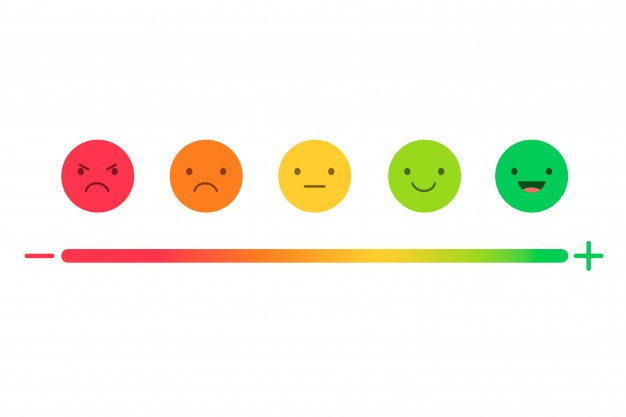

# **Thank you**
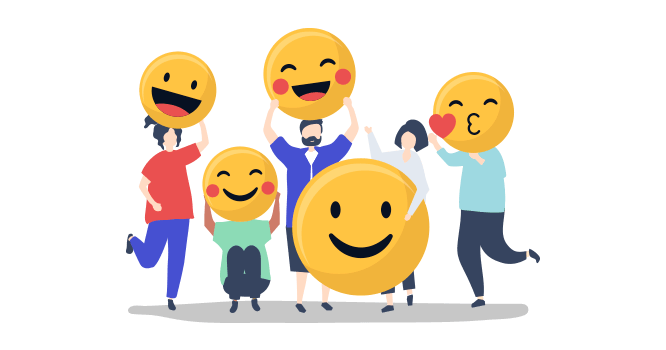